In [1]:
# Required libraries
import sys
import os
import IPython as IP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pickle
from include import helpers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
import seaborn as sns

%matplotlib inline 
sns.set_palette('Set1')

In [4]:
# Set your path to the original dataset
us8k_path = os.path.abspath('../Yi-Source-Code-3/input/vds_sound' )
metadata_path = os.path.join(us8k_path, 'metadata/sound_vds15_vds16_14k.csv')
audio_path = os.path.join(us8k_path, 'audio')

sound_Selected = os.path.join(us8k_path, 'metadata/C6_sound_vds15_vds16_14l.csv')
#sound_C5 = os.path.join(us8k_path, 'metadata/info_sound_C5.csv')

In [5]:
# Load the metadata from the generated CSV
df = pd.read_csv(metadata_path)
df.head()

,slice_file_name,fold,class,vds,ClassID,C6
0,vds15_0427_7_1.wav,fold7,7,15,1,1
1,vds15_0427_7_2.wav,fold7,7,15,1,1
2,vds15_0427_7_3.wav,fold7,7,15,1,1
3,vds15_0427_7_4.wav,fold7,7,15,1,1
4,vds15_0427_7_5.wav,fold7,7,15,1,1


In [6]:
df.count()

slice_file_name    14255
fold               14255
class              14255
vds                14255
ClassID            14255
C6                 14255
dtype: int64

## Pandas 연습하고, 하자

In [7]:
df2 = df.copy()

In [8]:
#selected_labels = ['down_1', 'down_2','down_3', 'up_4','up_5','up_6']
selected_labels = ['1', '2','3', '4','5','6']
df_label=df2[df2['C6'].isin(selected_labels)]

In [9]:
df_label.head()

,slice_file_name,fold,class,vds,ClassID,C6
0,vds15_0427_7_1.wav,fold7,7,15,1,1
1,vds15_0427_7_2.wav,fold7,7,15,1,1
2,vds15_0427_7_3.wav,fold7,7,15,1,1
3,vds15_0427_7_4.wav,fold7,7,15,1,1
4,vds15_0427_7_5.wav,fold7,7,15,1,1


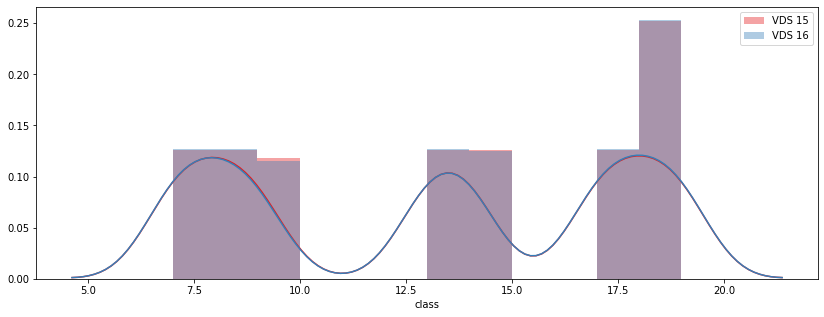

In [10]:
plt.figure(figsize=(14, 5))
sns.distplot(df_label[df_label['vds'] == 15]['class'], label= "VDS 15")
sns.distplot(df_label[df_label['vds'] == 16]['class'], label= "VDS 16")
plt.legend();

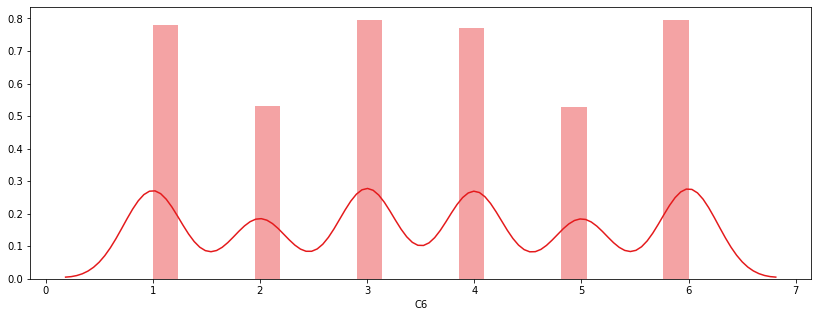

In [11]:
plt.figure(figsize=(14, 5))
sns.distplot(df_label['C6']);

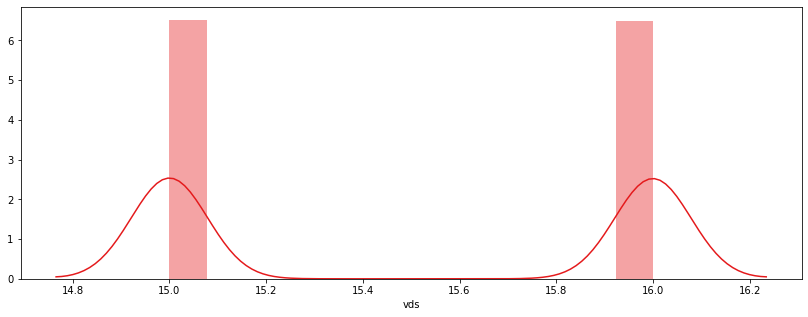

In [12]:
plt.figure(figsize=(14, 5))
sns.distplot(df_label['vds']);
#sns.distplot(df_label['class']);

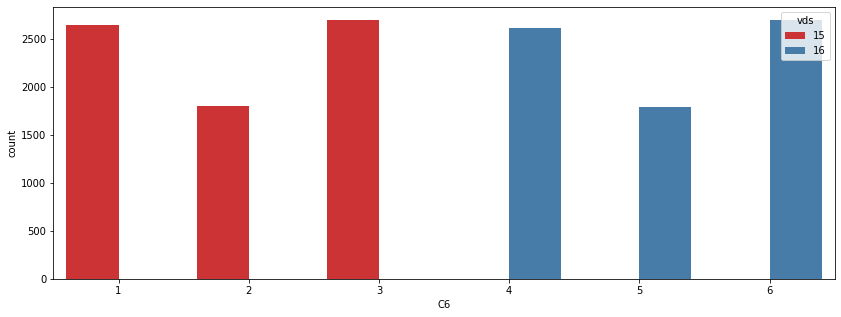

In [13]:
plt.figure(figsize=(14, 5))
sns.countplot(df_label['C6'], hue = df_label['vds']);

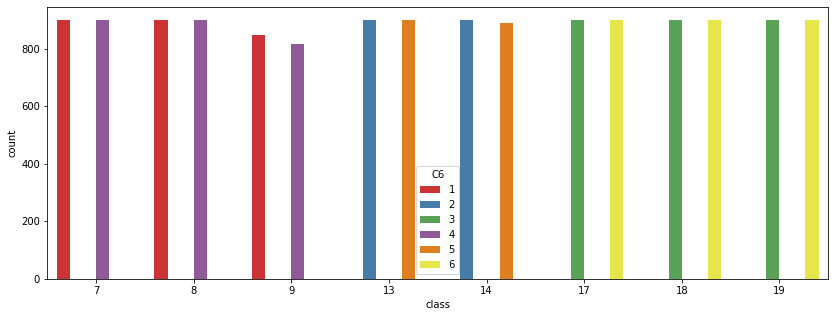

In [14]:
plt.figure(figsize=(14, 5))
sns.countplot(df_label['class'], hue = df_label['C6']);

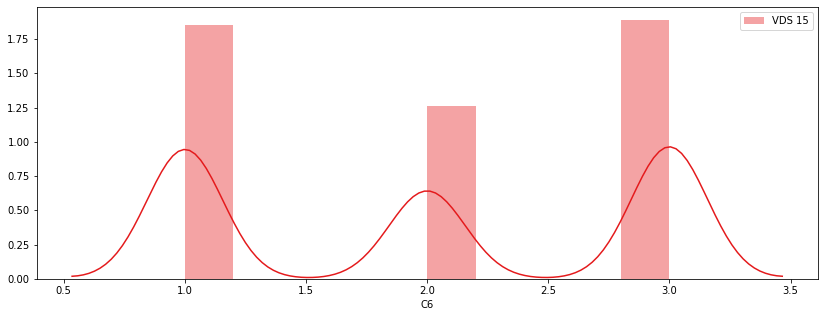

In [15]:
plt.figure(figsize=(14, 5))
sns.distplot(df_label[df_label['vds'] == 15]['C6'], label= "VDS 15")
#sns.distplot(df_label[df_label['vds'] == 16]['class'], label= "VDS 16")
plt.legend();

In [16]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14255 entries, 0 to 14254
Data columns (total 6 columns):
slice_file_name    14255 non-null object
fold               14255 non-null object
class              14255 non-null int64
vds                14255 non-null int64
ClassID            14255 non-null int64
C6                 14255 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.4+ MB


In [17]:
df_label['C6'].count()

14255

In [18]:
df_label['C6'].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14245, 14246, 14247, 14248, 14249, 14250, 14251, 14252, 14253,
            14254],
           dtype='int64', length=14255)

In [19]:
df_label.to_csv(sound_Selected, mode='w')
#df_label.to_csv(sound_C5, mode='w')

In [20]:
# Get a random file
row = df_label.sample(1)
#print(row)
#print('row=',str(row.iloc[0,1]))

file_path = audio_path + '/'+ str(row.iloc[0,1]) +'/' + str(row.iloc[0,0])

print(str(row.iloc[0,1]),file_path)
#rint(str(row["fold"]))


print('vdsID=',str(row.iloc[0,3]))
print('classID=', str(row.iloc[0,5]))

fold13 D:\KISTI\Project\052020-Traffic-Sound\Yi-Source-Code-3\input\vds_sound\audio/fold13/vds16_0504_13_847.wav
vdsID= 16
classID= 5


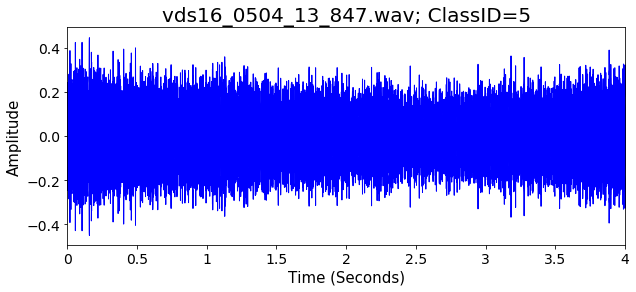

In [89]:
#row = df_label.sample(1)
#file_path = audio_path + '/'+ str(row.iloc[0,1]) +'/' + str(row.iloc[0,0])
#file_path = audio_path + '/'+ fold19+'/'+ 04_28_19_240.wav
plt.figure(figsize=(10, 4))

y, sr = librosa.load(file_path)  
librosa.display.waveplot(y, sr=sr, color='b') 


#plt.title(str(row.iloc[0,1]),fontsize=20)
plt.ylabel('Amplitude',fontsize=15)
plt.xlabel('Time (Seconds)',fontsize=15)
#plt.xticks(np.arange(0,4.1,0.5), fontsize=20)
#plt.yticks(np.arange(-0.8, 0.9, 0.4), fontsize=20)
plt.xticks(np.arange(0,4.1,0.5), fontsize=14), plt.yticks(fontsize=14)
#plt.tight_layout()
plt.title(str(row.iloc[0,0])+'; ClassID='+str(row.iloc[0,5]),fontsize=20)
plt.savefig('./output/images_C6/wave_'+str(row.iloc[0,4])+'.png')
plt.show()


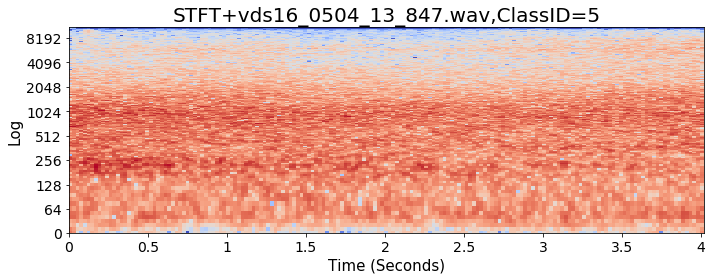

In [73]:
# Windowing
n_fft=2048
hop_length=512

# Load audio file
y, sr = librosa.load(file_path)

# Normalize between -1 and 1
normalized_y = librosa.util.normalize(y)

# Compute STFT
stft = librosa.core.stft(normalized_y, n_fft=n_fft, hop_length=hop_length)

# Convert sound intensity to log amplitude:
stft_db = librosa.amplitude_to_db(abs(stft))

# Plot spectrogram from STFT
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_db, x_axis='time', y_axis='log')

plt.title('STFT' '+' + str(row.iloc[0,0]+',ClassID='+str(row.iloc[0,5])),fontsize=20)
plt.ylabel('Log',fontsize=15)
plt.xlabel('Time (Seconds)',fontsize=15)
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('./output/images_C6/stft_'+str(row.iloc[0,4])+'.png')
plt.show()

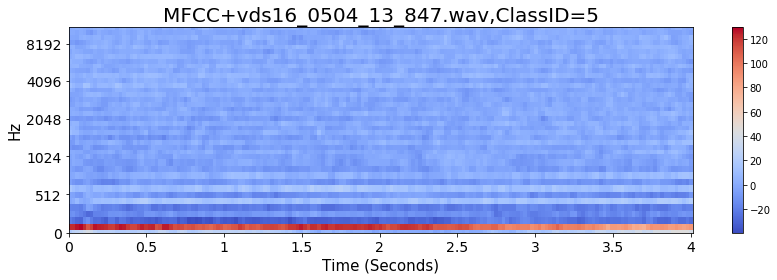

In [36]:
# Generate MFCC coefficients
mfcc = librosa.feature.mfcc(normalized_y, sr, n_mfcc=40)

# Plot spectrogram from STFT
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
plt.colorbar()
#plt.title('MFCC')
plt.title('MFCC' '+' + str(row.iloc[0,0]+',ClassID='+str(row.iloc[0,5])),fontsize=20)
plt.xticks(fontsize=14), plt.yticks(fontsize=14)
plt.xlabel('Time (Seconds)', fontsize=15)
plt.ylabel('Hz', fontsize=15)
plt.tight_layout()
plt.savefig('./output/images_C6/mfcc_'+str(row.iloc[0,4])+'.png')
plt.show()

#### 1.4 MEL-Scaled filter banks

Although MFCCs work very well, there's still a problem with it: Discrete Cosine Transform (DCT) is used to decorrelate filter bank coefficients (a process referred to as "whitening"). DCT, as a linear transform, will discard some information from the original signal (something we don't really want to happen).<br/>
Whitening was required for models that where more susceptible to highly correlated input (like Gaussian Mixture Models), but as deep neural networks are much less susceptible we could easily eliminate DCT from the pipeline.<br/>
<br/>
Once the filter banks had been computed they are scaled to the MEL scale to obtain the MEL-Scaled filter banks. This is how a MEL Spectrogram looks:

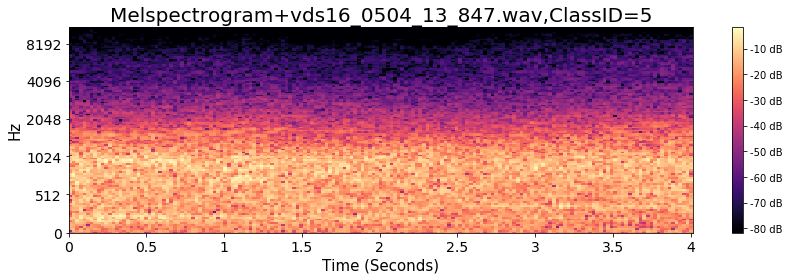

In [39]:
n_mels = 128

# Generate mel scaled spectrogram
mel = librosa.feature.melspectrogram(S=stft, n_mels=n_mels)

# Convert sound intensity to log amplitude:
mel_db = librosa.amplitude_to_db(abs(mel))

# Normalize between -1 and 1
normalized_mel = librosa.util.normalize(mel_db)

# Plot spectrogram from STFT
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_db, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB');
plt.title('Melspectrogram' '+' + str(row.iloc[0,0]+',ClassID='+str(row.iloc[0,5])),fontsize=20)
plt.xticks(fontsize=14), plt.yticks(fontsize=14)
plt.xlabel('Time (Seconds)', fontsize=15)
plt.ylabel('Hz', fontsize=15)
#plt.title('MFCC' '+' + str(row.iloc[0,1]),fontsize=20)
plt.tight_layout()
plt.savefig('./output/images_C6/mel_'+str(row.iloc[0,4])+'.png')
plt.show()




## MFCC 데이터 만들기

In [ ]:
# Iterate through all audio files and extract MFCC
features = []
labels = []
frames_max = 0
counter = 0
total_samples = len(df_label)
n_mfcc = 40
audio= os.path.abspath(audio_path)

for index, row in df_label.iterrows():
    file_path = os.path.join(audio, str(row["fold"]),str(row["slice_file_name"]))
    class_label = row["C6"]

    # Extract MFCCs (do not add padding)
    mfccs = helpers.get_mfcc(file_path, 0, n_mfcc)
    
    # Save current frame count
    num_frames = mfccs.shape[1]
    
    # Add row (feature / label)
    features.append(mfccs)
    labels.append(class_label)

    # Update frames maximum
    if (num_frames > frames_max):
        frames_max = num_frames

    # Notify update every N files
    if ((counter % 500) == 0):
        print("Status:({}) {}/{}".format(index, counter, total_samples))

    counter += 1
    
print("Finished: {}/{}".format(counter, total_samples))

In [ ]:
# Add padding to features with less than frames than frames_max
padded_features = helpers.add_padding(features, frames_max)

In [ ]:
# Verify shapes
print("Raw features length: {}".format(len(features)))
print("Padded features length: {}".format(len(padded_features)))
print("Feature labels length: {}".format(len(labels)))

#### 3.2 Save MFCC features

In [ ]:
# Convert features (X) and labels (y) to Numpy arrays
X = np.array(padded_features)
y = np.array(labels)

# Optionally save the features to disk
np.save("./data/X_C6_mfcc_40", X)
np.save("./data/y_C6_mfcc_40", y)

#### 3.4 MEL Spectrogram extraction

Let's also extract the MEL Spectrograms to compare performance with both feature types.

In [ ]:
# Iterate through all audio files and extract MFCC
features = []
labels = []
frames_max = 0
counter = 0
total_samples = len(df_label)
n_mels=40
audio = os.path.abspath(audio_path)
for index, row in df_label.iterrows():
    file_path = os.path.join(audio, str(row["fold"]),str(row["slice_file_name"]))
    class_label = row["C6"]

    # Extract Log-Mel Spectrograms (do not add padding)
    mels = helpers.get_mel_spectrogram(file_path, 0, n_mels=n_mels)
    
    # Save current frame count
    num_frames = mels.shape[1]
    
    # Add row (feature / label)
    features.append(mels)
    labels.append(class_label)

    # Update frames maximum
    if (num_frames > frames_max):
        frames_max = num_frames

    # Notify update every N files
    if ((counter % 500) == 0):
        print("Status:({}) {}/{}".format(index, counter, total_samples))

    counter += 1
    
print("Finished: {}/{}".format(counter, total_samples))

In [ ]:
# Add padding to features with less than frames than frames_max
padded_features = helpers.add_padding(features, frames_max)

In [ ]:
# Verify shapes
print("Raw features length: {}".format(len(features)))
print("Padded features length: {}".format(len(padded_features)))
print("Feature labels length: {}".format(len(labels)))

#### 3.26 Save Mel Spectrogram features

In [ ]:
# Convert features (X) and labels (y) to Numpy arrays
X = np.array(padded_features)
y = np.array(labels)

np.save("./data/X_C6_mels_40", X)
np.save("./data/y_C6_mels_40", y)

### 4. Next

With all the features being extracted, normalized and saved to disk, we can finally start experimenting! On the next notebook we are going to test how an extremely simple model fits the data and evaluate how to add complexity to improve its performance.<br/>
<br/>
<br/>